In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
import pandas as pd

In [2]:
def degree(g, nodes=None, as_list=True):
    deg = None
    if nodes:
        deg = dict(g.degree(nodes))
    else:
        deg = dict(g.degree())
    
    if as_list:
        return list(deg.values())
    return deg

def degree_plot(g, nodes, title=''):
    deg = degree(g, nodes)
    bins = 100
    if len(nodes) < 100:
        bins = len(nodes)
    hist = np.histogram(deg, bins=bins)
    v = range(min(deg), max(deg)+1)
    freqs, edges = hist[0], hist[1]
    n = freqs.size
    means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]
    
    # SCATTER PLOT
    plt.plot(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")
    plt.title("Degree distribution for %s" % title)
    plt.show()
    
    # LOG LOG PLOT
    plt.loglog(means, freqs, ".")
    plt.xlabel("log(k)")
    plt.ylabel("log(frequency)")
    plt.title("Log-log degree distribution for %s" % title)
    plt.show()

In [14]:
USER = 'user'
BIZ = 'biz'

In [15]:
biz = pd.read_csv('toronto/toronto_biz.csv')
user = pd.read_csv('toronto/toronto_users.csv')
reviews = pd.read_csv('toronto/toronto_reviews.csv')

In [17]:
print('Reviews:', len(reviews))
print('Users:', len(set(reviews.user_id)))
print('Businesses:', len(set(reviews.business_id)))

Reviews: 379875
Users: 84624
Businesses: 9678


### Creating the network

In [18]:
# A node class for storing data.
class Node:
    def __init__(self, Data, Type):
        self.Data = Data
        self.Type = Type
    
    def to_string(self):
        return "Node (%s), Data: " % (self.Type, self.Data)
    
    def __hash__(self):
        return hash(self.Data)
    def __eq__(self, other):
        return (
                self.__class__ == other.__class__ and 
                self.Data == other.Data
               )

In [19]:
graph = nx.Graph()
for row in reviews.itertuples():
    b = Node(row.business_id, BIZ)
    u = Node(row.user_id, USER)
    graph.add_edge(u, b)

In [20]:
print('Nodes:', len(graph.nodes()))
print('Edges:', len(graph.edges()))

Nodes: 94291
Edges: 379875


### Degree Dist

In [21]:
biz_nodes = [n for n in list(graph.nodes()) if n.Type == BIZ]
user_nodes = [n for n in list(graph.nodes()) if n.Type == USER]

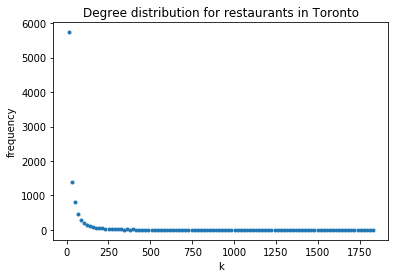

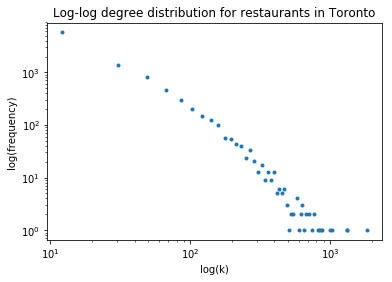

In [23]:
degree_plot(graph, biz_nodes, "restaurants in Toronto")

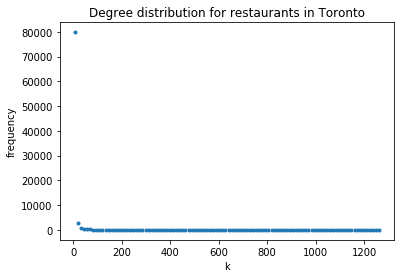

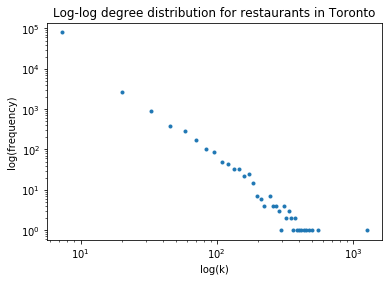

In [24]:
degree_plot(graph, user_nodes, "restaurants in Toronto")

### Eigenvector Centrality

In [25]:
ev_centrality = nx.eigenvector_centrality_numpy(graph)
sorted_ev_centrality = sorted(ev_centrality.items(), key=lambda x: x[1], reverse=True)
ev_biz = [(n, ev) for (n, ev) in sorted_ev_centrality if n.Type == BIZ]
ev_user = [(n, ev) for (n, ev) in sorted_ev_centrality if n.Type == USER]

In [26]:
ev_biz[:5]

[(<__main__.Node at 0xa18e1bd68>, 0.13026075212085406),
 (<__main__.Node at 0xa18e37668>, 0.11483288373744968),
 (<__main__.Node at 0xa18e86c18>, 0.0996225470084341),
 (<__main__.Node at 0xa18e69278>, 0.09070442917508179),
 (<__main__.Node at 0xa18fcfc18>, 0.09019682432848951)]

In [32]:
for (n,e) in ev_user[:50]:
    user_id = n.Data
    u = user[user.user_id == user_id]
    elite = u.elite.iloc[0] != 'None'
    print(u.name.iloc[0], "- Elite?:", elite)

Jennifer - Elite?: True
Laura C - Elite?: True
Elle - Elite?: True
Lauren - Elite?: True
Elvis - Elite?: True
Evelyn - Elite?: True
Imran - Elite?: True
Mariko - Elite?: True
Steph - Elite?: True
Amelia - Elite?: True
Yvonne - Elite?: True
Natalie - Elite?: True
Jared - Elite?: True
Karen - Elite?: True
Faiza - Elite?: True
Sarah - Elite?: True
Jenny - Elite?: True
Denise - Elite?: True
Vivek - Elite?: True
Melissa - Elite?: True
Neha - Elite?: False
Christian - Elite?: True
Kent - Elite?: True
Cin - Elite?: True
David - Elite?: True
Owen - Elite?: True
Alice - Elite?: True
Phillip - Elite?: True
Soleil - Elite?: True
Shirley - Elite?: True
WaYnE - Elite?: True
Justine - Elite?: True
Itanni - Elite?: True
Tina - Elite?: True
Tiff - Elite?: True
Joanne - Elite?: True
Barbara - Elite?: True
Dixie - Elite?: True
Teena - Elite?: True
Lynn - Elite?: True
Precilla - Elite?: True
Jay - Elite?: False
Brandon - Elite?: True
Kat - Elite?: True
Steven - Elite?: True
Maheen - Elite?: True
Sue A. -

In [33]:
for i in range(50):
    b = biz[biz.business_id == ev_biz[i][0].Data]
    print(list(b.name))

['Pai Northern Thai Kitchen']
['Khao San Road']
['KINKA IZAKAYA ORIGINAL']
['Banh Mi Boys']
['Seven Lives Tacos Y Mariscos']
['Salad King Restaurant']
['Bang Bang Ice Cream and Bakery']
['Gusto 101']
["Uncle Tetsu's Japanese Cheesecake"]
['Wvrst']
['Momofuku Noodle Bar']
['Sansotei Ramen']
['The Stockyards']
['Hokkaido Ramen Santouka']
['Insomnia Restaurant & Lounge']
['Grand Electric']
['Japango']
['Bannock']
["Mildred's Temple Kitchen"]
['Sweet Jesus']
['Pizzeria Libretto']
['Rol San']
['Byblos']
['El Catrin Destileria']
['Miku']
['Richmond Station']
['Tsujiri']
['Nadege']
['Terroni']
['Manpuku Japanese Eatery']
['Buk Chang Dong Soon Tofu']
['Black Hoof']
['Beerbistro']
['KINKA IZAKAYA BLOOR']
['KINTON RAMEN']
["The Burger's Priest"]
['Wilbur Mexicana']
["Mother's Dumplings"]
['Barque Smokehouse']
['Kekou Gelato House']
['Lady Marmalade']
['Canoe']
['Banh Mi Boys']
['La Carnita']
['Le Sélect Bistro']
['Kekou Gelato']
['The Gabardine']
['Patria']
['Sukho Thai']
['Yuzu No Hana']
